In [3]:

import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pandas as pd


      Gas_Price        Date
0        31.040  2012-01-03
1        27.250  2012-01-04
2        25.100  2012-01-05
3        23.965  2012-01-06
4        24.600  2012-01-07
...         ...         ...
4262     32.610  2023-09-04
4263     32.310  2023-09-05
4264     32.540  2023-09-06
4265     31.560  2023-09-07
4266     31.970  2023-09-08

[4267 rows x 2 columns]
        Return        Date
0     0.150695  2012-01-03
1    -0.122101  2012-01-04
2    -0.078899  2012-01-05
3    -0.045219  2012-01-06
4     0.026497  2012-01-07
...        ...         ...
4262  0.000307  2023-09-04
4263 -0.009200  2023-09-05
4264  0.007119  2023-09-06
4265 -0.030117  2023-09-07
4266  0.012991  2023-09-08

[4267 rows x 2 columns]
[835, 2685, 3405, 3545, 3835, 3930, 4060, 4267]
2014-04-16
2019-05-10
2021-04-29
2021-09-16
2022-07-03
2022-10-06
2023-02-13
2023-09-08


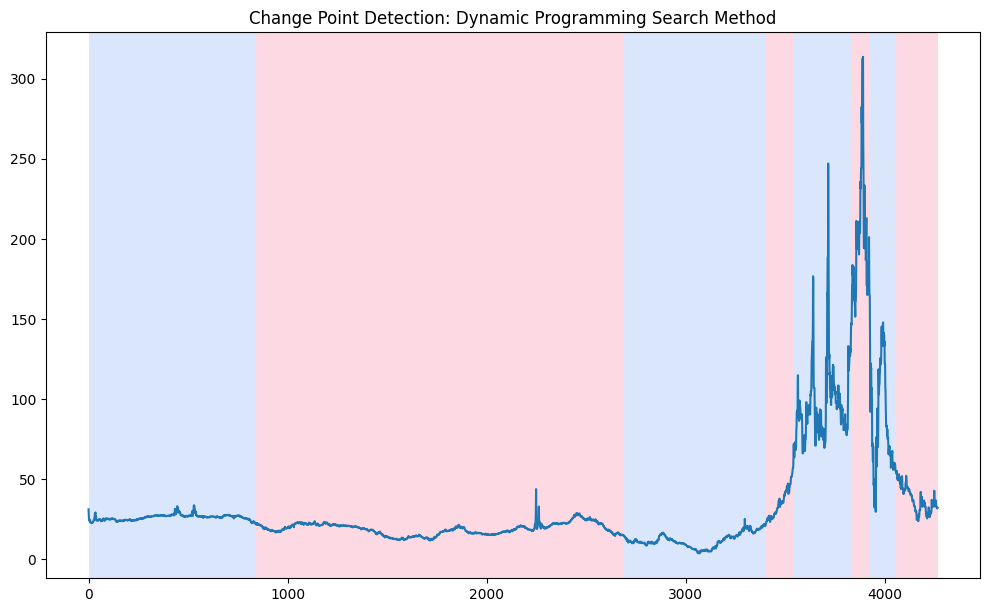

In [45]:
df=pd.read_csv("Final_Dataset.csv").iloc[:,1:]
price_series=df.iloc[:,-1:]
price_series["Date"]=df["Date"].values
print(price_series)

return_series=pd.DataFrame()
return_series["Return"]=df["Target"].values
return_series["Date"]=df["Date"].values
print(return_series)

points=price_series["Gas_Price"].values

#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=7)
print(my_bkps)
for i in range(len(my_bkps)):
    print(df["Date"].values[my_bkps[i]-1])
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

